**Introduction**

About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare.

The purpose of this notebook is to determine if a person has heart disease based on some other factors like BMI and Blood Pressure. In order to do that the dataset will be explored and pre processed using different methods. Then different models will be build based on the data and the model with best accuracy will be the most suitable one.

**Importing all the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import seaborn as sns

from matplotlib import colors as c
from matplotlib import gridspec as grid

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import RocCurveDisplay

**Reading the Dataset**

The dataset came from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.The original dataset of nearly 300 variables which was reduced to just about 18 variables. For this Dataset "HeartDisease" is the target variable whose output can be either of the one, yes or no. This dataset can be solved by different classification algorithms.


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Sanikap05/DataScience/main/heart_2020_cleaned.csv")


In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Exploring and Pre Processing the Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**Data Visualization**

In [7]:
#Checking for null
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

For the selected dataset all features are of different type. So to visualize them different techniques are used.

> Binary categorical features: HeartDisease, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease , SkinCancer, PhysicalActivity, DiffWalking

> Ordinal categorical features: AgeCategory, GenHealth

> Nominal categorical features: Race, Diabetic

> Continuous numerical features: BMI

> Discrete numerical features: PhysicalHealth,MentalHealth, SleepTime



In [8]:
# Convert color palette into rgba format for later use
c1 = c.to_rgba('#F0073B')
c2 = c.to_rgba("#E7134B")
c3 = c.to_rgba("#DE1E5A")
c4 = c.to_rgba("#D52A6A")
c5 = c.to_rgba("#CB3579")
c6 = c.to_rgba("#C24189")
c7 = c.to_rgba('#B94C98')

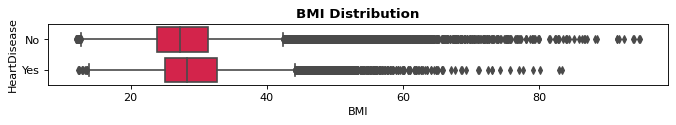

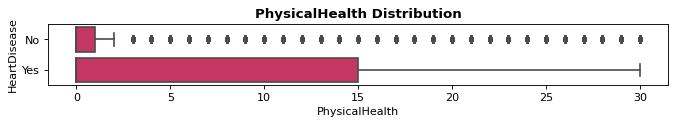

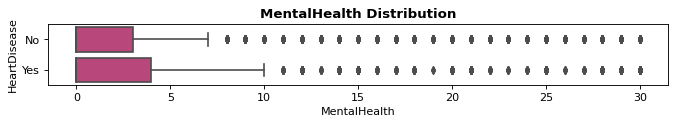

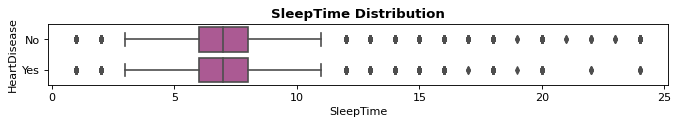

In [9]:
#numerical featue distribution
cont_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
boxplot_color = [c1,c3,c5,c7]


for i in range(0,len(cont_col)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df[cont_col[i]], y=df['HeartDisease'], data=df, orient="h", color=boxplot_color[i])
    plt.title(cont_col[i] + " Distribution", fontweight='bold')
    plt.show()

The boxplots show there are no significant differences between adults with and without heart disease in BMI, sleep time and mental health as well as the distinct distribution in physical health between these evaluated groups, further correlation analysis will be conducted later to evaluate the relationship of heart disease and these features.

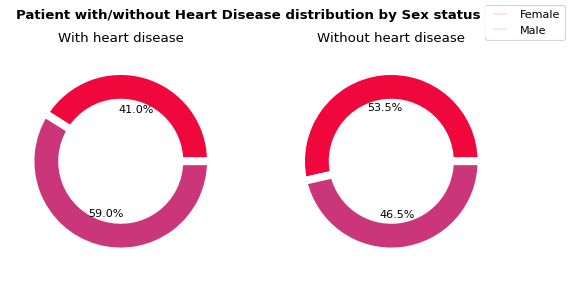

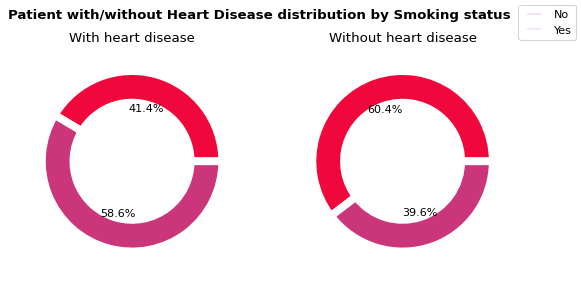

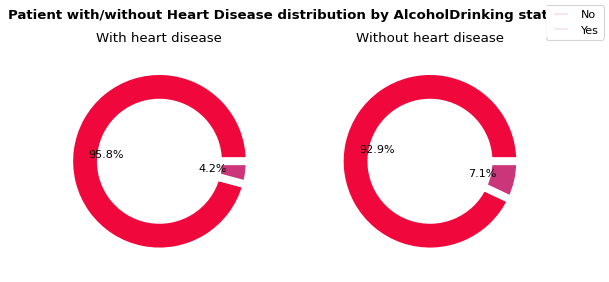

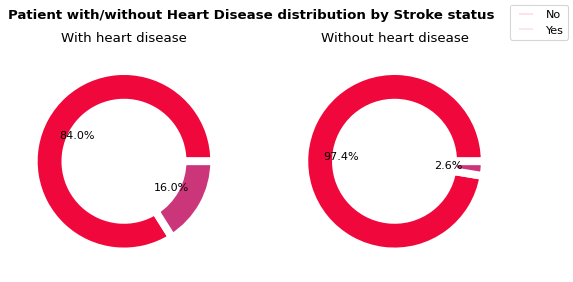

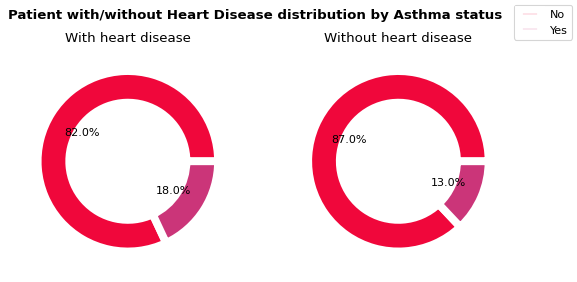

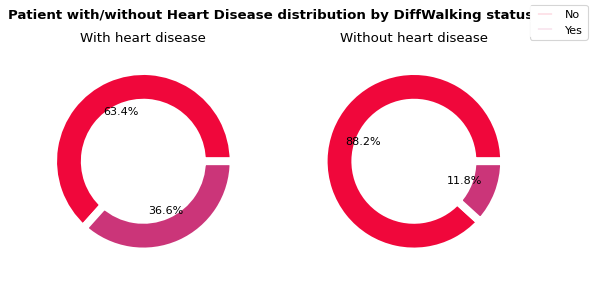

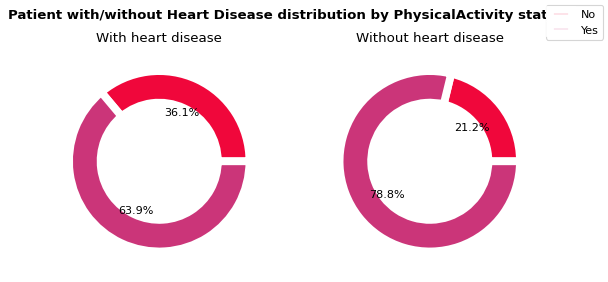

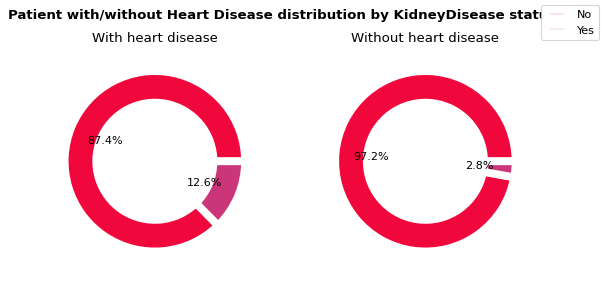

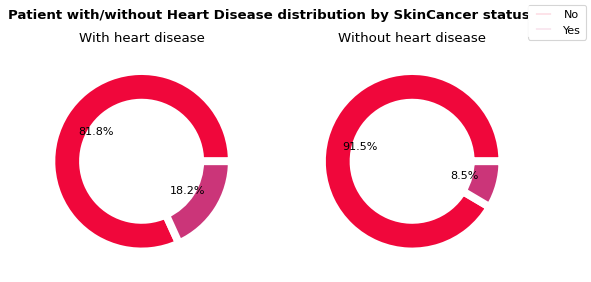

In [10]:
#Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']


for i in range(1, len(binary_cols)):
    fig = plt.figure(figsize=(8,4), dpi=80)
    
    # Plot distribution of adults with heart disease
    ax1 = plt.subplot(1,2,1)
    df[df['HeartDisease'] == 'Yes'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie', colors= [c1, c5], autopct='%.1f%%', labeldistance=None,
                                                                                        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With heart disease")
    
    # Plot distribution of adults without heart disease
    ax2 = plt.subplot(1,2,2)
    df[df['HeartDisease'] == 'No'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie',  colors= [c1, c5], autopct='%.1f%%', labeldistance=None,
                                                                                     wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without heart disease")
    plt.suptitle("Patient with/without Heart Disease distribution by " + binary_cols[i] + " status", fontweight='bold')
    
    handles, labels = ax1.get_legend_handles_labels()

        
    leg = fig.legend(handles, labels, loc = 'upper right', fancybox=True)
    
        
    plt.subplots_adjust(right=0.9)
    plt.show()

From the above visualizations, following interpretations can be made:

*   There are more male adults that have heart disease than female peers
*   Within sample population with heart disease there are more smokers than non-smokers
*   There is no noticeable differences between adults with and without heart disease in being a heavy drinker or having asthma
*   People who diagnosed with and without heart disease are slightly distinct in physical activity, diagnosed with kidney disease or skin cancer.



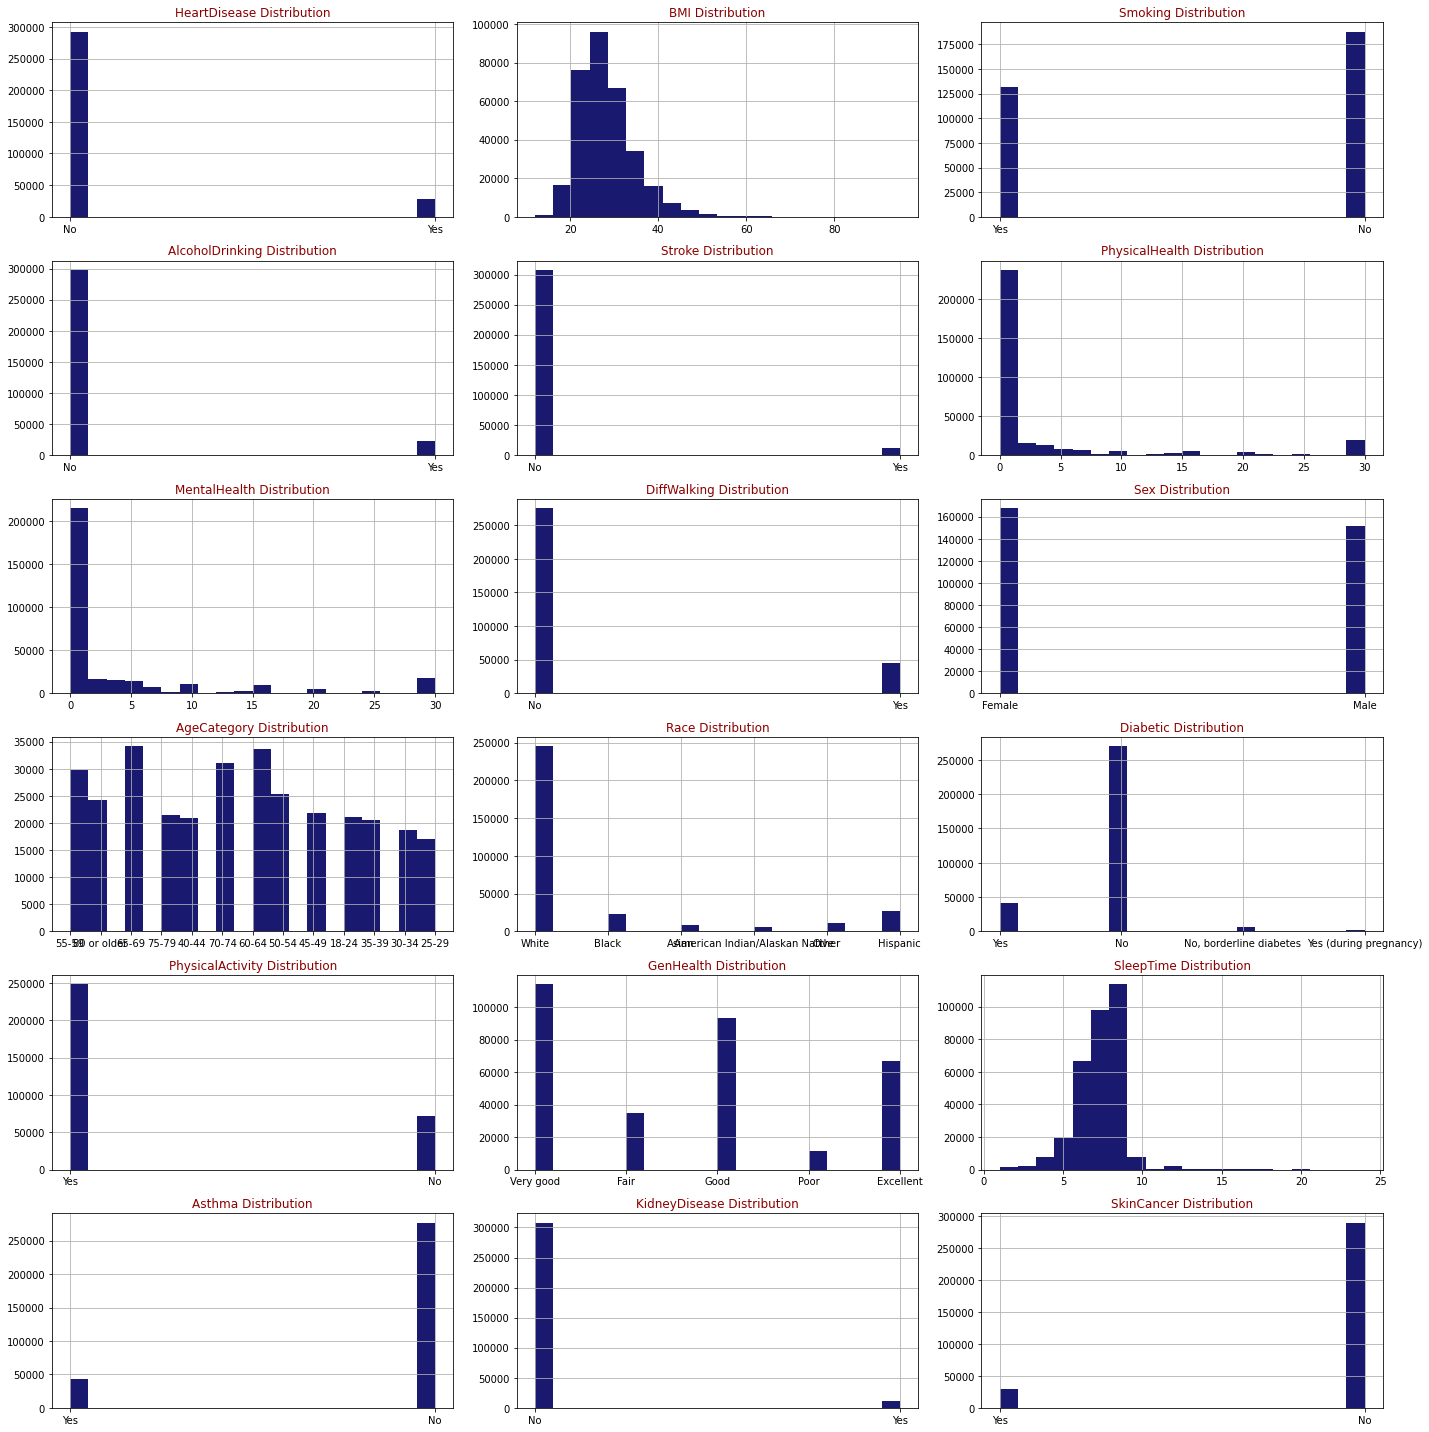

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)


**Data Cleaning**

In [12]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.5 MB/s 


In [13]:
import category_encoders as ce

Most of the Machine learning algorithms can not handle categorical variables unless they are converted  to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded.

 There are many ways to encode these categorical variables as numbers and use them in an algorithm. Some techniques are: One Hot Encoding, Label Encoding, Ordinal Encoding and Binary Encoding.



In [14]:
# Enconding categorical variables
t_df = df

#Binary encoding variables
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']

for col in binary_cols:
    t_df[col] = t_df[col].replace(list(t_df[col].unique()),[0,1])


#One hot encoding for variables

race_encoder=ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)

diabetic_encoder = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', return_df=True, use_cat_names=True)

#Ordinal encoding for variables

age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                           mapping=[{'col':'AgeCategory',
'mapping':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True,
                                    mapping=[{'col':'GenHealth',
                                            'mapping':{'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}}])


t_df = age_encoder.fit_transform(t_df)
t_df = health_encoder.fit_transform(t_df)
t_df = race_encoder.fit_transform(t_df)
t_df = diabetic_encoder.fit_transform(t_df)

t_df.head(5)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,...,1.0,0.0,0.0,0.0,0,3,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,12,...,0.0,1.0,0.0,0.0,0,3,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,9,...,1.0,0.0,0.0,0.0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,11,...,0.0,1.0,0.0,0.0,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,...,0.0,1.0,0.0,0.0,0,3,8.0,1,0,1


In [15]:
# Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = t_df.columns
d = scaler.fit_transform(t_df)

scaled_df = pd.DataFrame(d, columns=names)


scaled_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,0.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,...,1.0,0.0,0.0,0.0,0.0,0.75,0.173913,0.0,0.0,0.0
1,0.0,0.100447,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.75,0.260870,1.0,0.0,1.0
2,0.0,0.175782,0.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,...,1.0,0.0,0.0,0.0,0.0,0.25,0.304348,0.0,0.0,1.0
3,0.0,0.147169,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,...,0.0,1.0,0.0,0.0,1.0,0.50,0.217391,1.0,0.0,0.0
4,0.0,0.141132,1.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.75,0.304348,1.0,0.0,1.0


Finally, since the dataset is undersampled with many data for adults without heart disease, it should be oversampled with data to make it more balanced.

In [16]:
class_0 = scaled_df[scaled_df['HeartDisease'] == 0]
class_1 = scaled_df[scaled_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64


**Correlation**

Finding the Correlation
Find variables that have strong correlation with prevelance heart disease to optimize the model


In [17]:
from sklearn.metrics import matthews_corrcoef

cols = train_df.columns
corr = []

for col in cols:
    if col in binary_cols:
        corr.append(matthews_corrcoef(train_df['HeartDisease'], train_df[col]))
    else:
        corr.append(train_df['HeartDisease'].corr(train_df[col]))


correlation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])

correlation.drop(index=correlation.index[:1], axis=0, inplace=True)


correlation

,Variables,Corr_with_HeartDisease
1,BMI,0.088842
2,Smoking,-0.190243
3,AlcoholDrinking,-0.062111
4,Stroke,0.230587
5,PhysicalHealth,0.243619
6,MentalHealth,0.048894
7,DiffWalking,0.290317
8,Sex,0.125371
9,AgeCategory,0.440004
10,Race_White,0.074808


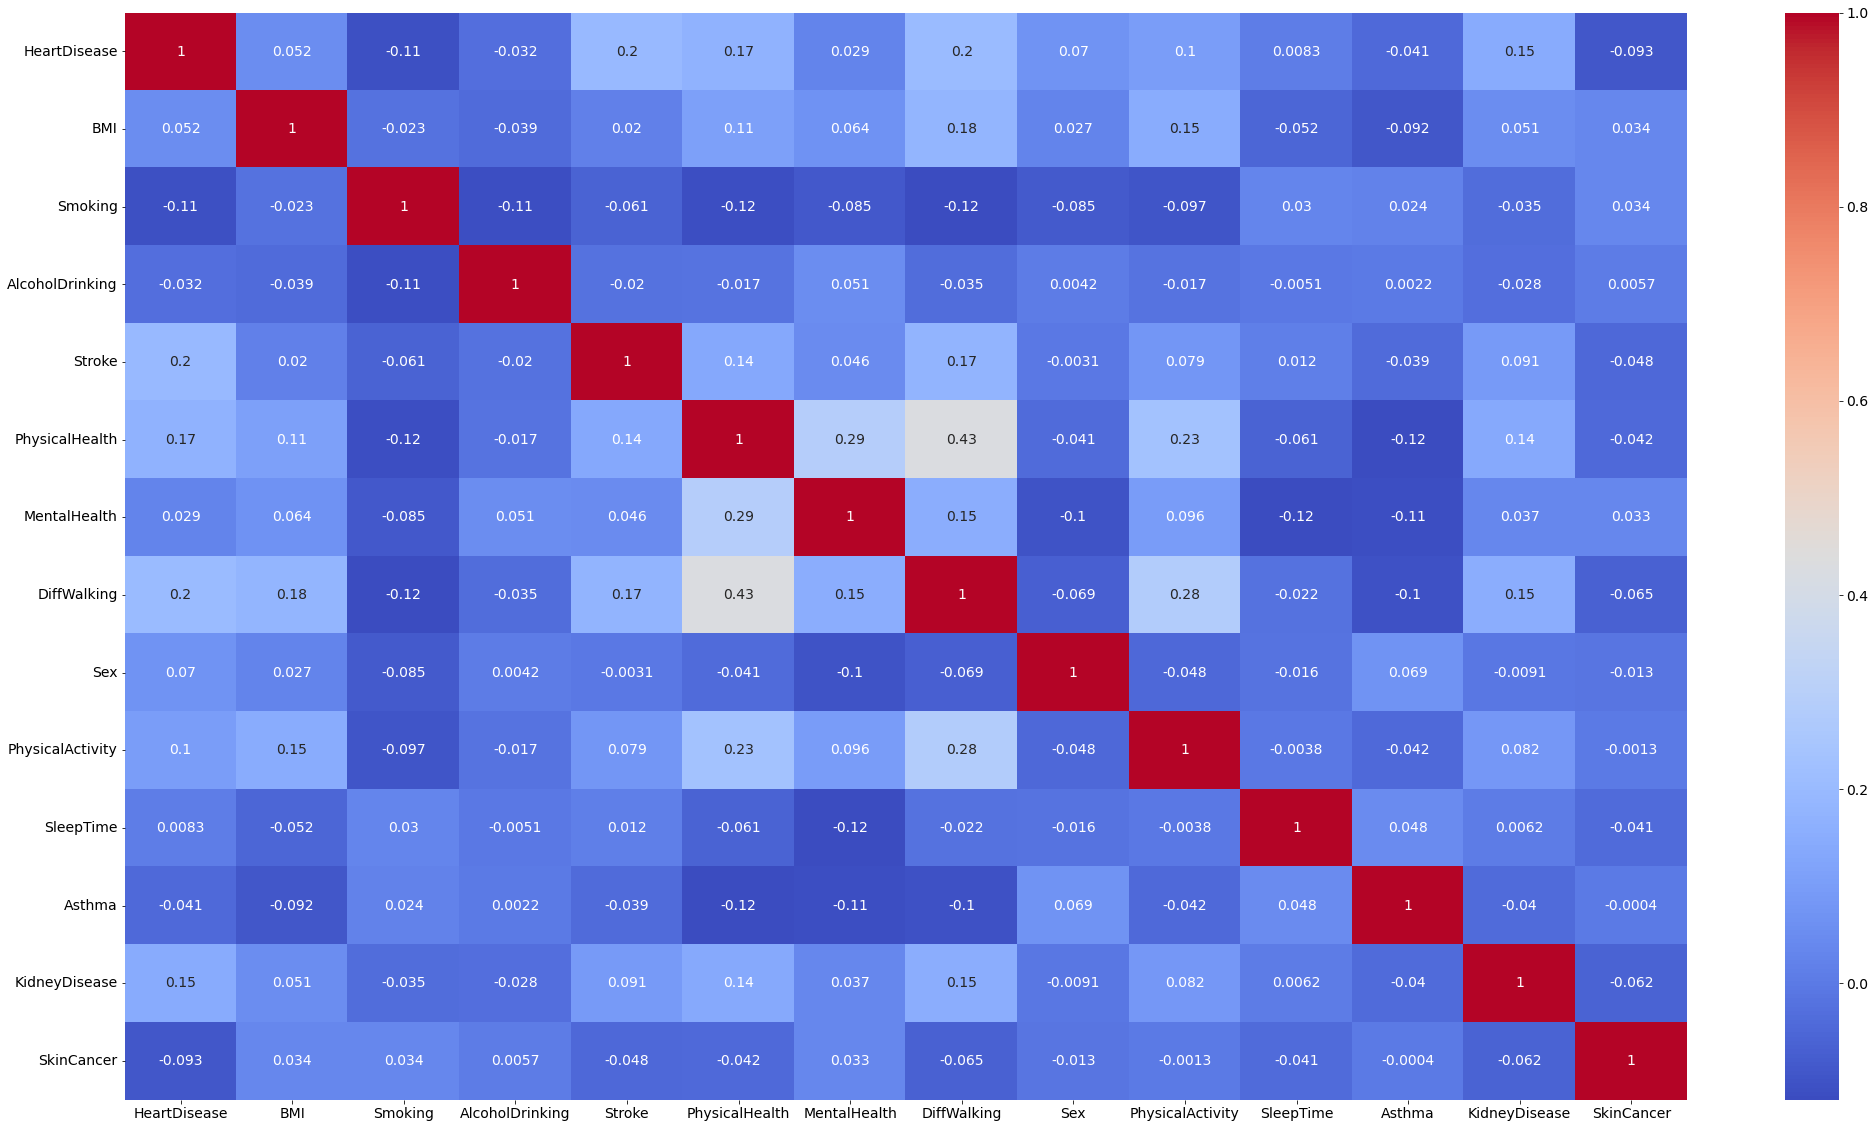

In [18]:
cor = df.corr()
plt.figure(figsize=(35,20))
plt.rc('font', **{'size': 14.0})
sns.heatmap(cor,annot=True, cmap="coolwarm")

In [19]:
# Create training and testing data for machine learning application
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic_Yes','Diabetic_No','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

**Random Forest**

In [20]:
# Create Random Forest
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
clf_y_predict = clf.predict(x_test)

In [21]:
acc_random = accuracy_score(y_test,clf_y_predict)
pre_random = precision_score(y_test,clf_y_predict)
re_random = recall_score(y_test,clf_y_predict)
f1_random = f1_score(y_test,clf_y_predict)

cm_random = confusion_matrix(y_test, clf_y_predict)

**Logistic Regression**

In [22]:
# Create LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)

In [23]:
acc_log = accuracy_score(y_test,lr_y_predict)
pre_log = precision_score(y_test,lr_y_predict)
re_log = recall_score(y_test,lr_y_predict)
f1_log = f1_score(y_test,lr_y_predict)

cm_log = confusion_matrix(y_test, lr_y_predict)

**K Nearest Neighbours**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Create KNeighborsClassifier
k_classifier = KNeighborsClassifier()
k_classifier.fit(x_train, y_train)
k_y_predict = k_classifier.predict(x_test)

In [26]:
acc_kn = accuracy_score(y_test,k_y_predict)
pre_kn = precision_score(y_test,k_y_predict)
re_kn = recall_score(y_test,k_y_predict)
f1_kn = f1_score(y_test,k_y_predict)

cm_kn = confusion_matrix(y_test, k_y_predict)

**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [29]:
acc_decision = accuracy_score(y_test,predictions)
pre_decision = precision_score(y_test,predictions)
re_decision = recall_score(y_test,predictions)
f1_decision = f1_score(y_test,predictions)

cm_decision = confusion_matrix(y_test, predictions)

**XGBoost**

In [30]:
from xgboost import XGBClassifier

# XGBoost
XGBoost = XGBClassifier(max_depth = 10, n_estimators = 100, random_state=0);
XGBoost.fit(x_train, y_train);
XGBoost_pred = XGBoost.predict(x_test)
XGBoost_matrix = confusion_matrix(y_test, XGBoost_pred, labels=[0, 1])

import warnings
warnings.filterwarnings('ignore')
print('XGBoost Model is Created!')

XGBoost Model is Created!


In [31]:
# evaluate algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
	# evaluate the model and collect the results
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

seed = 1

In [32]:
acc_xgboost = accuracy_score(y_test,XGBoost_pred)
pre_xgboost = precision_score(y_test,XGBoost_pred)
re_xgboost = recall_score(y_test,XGBoost_pred)
f1_xgboost = f1_score(y_test,XGBoost_pred)

cm_xgboost = confusion_matrix(y_test, XGBoost_pred)

**Comparison of all Models**

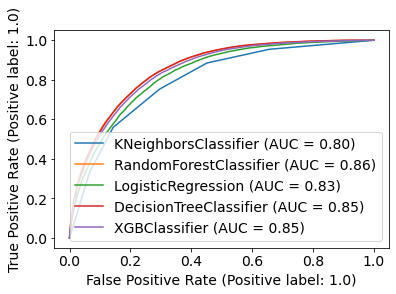

In [33]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
dt_disp= RocCurveDisplay.from_estimator(dtree, x_test, y_test, ax=ax)
xg_disp= RocCurveDisplay.from_estimator(XGBoost, x_test, y_test, ax=ax)
plt.show()

In [34]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'K-Neigbours Classifier', 'Decision Tree', 'XGBoost'],
    'Accuracy': [acc_random, acc_log, acc_kn, acc_decision, acc_xgboost],
    'Precision': [pre_random, pre_log, pre_kn, pre_decision, pre_xgboost],
    'Recall': [re_random, re_log, re_kn, re_decision, re_xgboost],
    'F1-Score': [f1_random, f1_log, f1_kn, f1_decision, f1_xgboost]
    })

models
# models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.774684,0.753280,0.816427,0.783583
1,Logistic Regression,0.751626,0.740027,0.775205,0.757208
2,K-Neigbours Classifier,0.728441,0.717500,0.752909,0.734778
3,Decision Tree,0.774282,0.753859,0.813997,0.782775
4,XGBoost,0.766827,0.744003,0.813056,0.776998


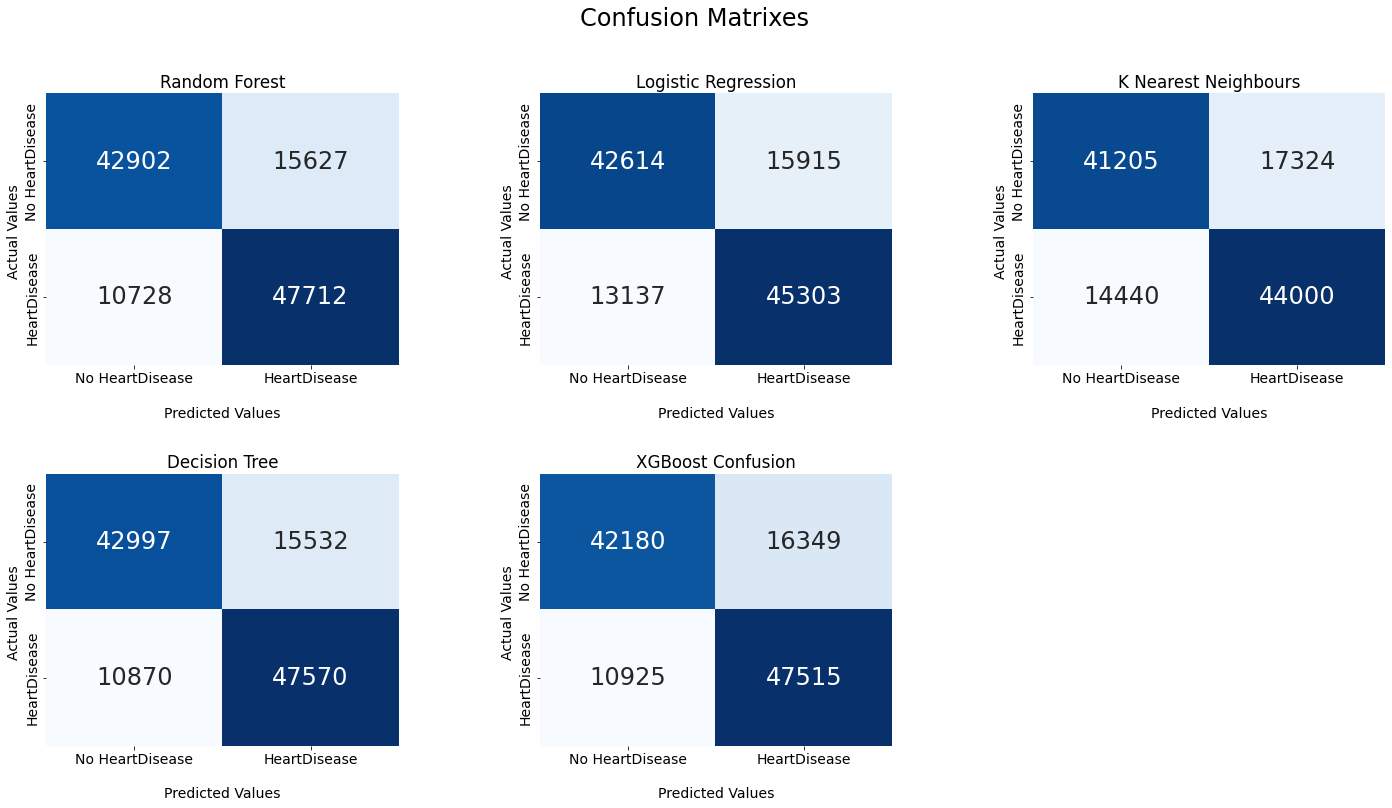

In [35]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Random Forest")
ax = sns.heatmap(cm_random,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.subplot(2,3,2)
plt.title("Logistic Regression")
ax = sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.subplot(2,3,3)
plt.title("K Nearest Neighbours")
ax = sns.heatmap(cm_kn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.subplot(2,3,4)
plt.title("Decision Tree")
ax = sns.heatmap(cm_decision, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.subplot(2,3,5)
plt.title("XGBoost Confusion")
ax = sns.heatmap(cm_xgboost,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

**Neural Network**

In [36]:
input_shape = [x_train.shape[1]]

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [38]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Epoch 1/200
914/914 [==============================] - 18s 18ms/step - loss: 0.5202 - binary_accuracy: 0.7470 - val_loss: 0.5028 - val_binary_accuracy: 0.7542
Epoch 2/200
914/914 [==============================] - 16s 17ms/step - loss: 0.5047 - binary_accuracy: 0.7542 - val_loss: 0.5025 - val_binary_accuracy: 0.7541
Epoch 3/200
914/914 [==============================] - 16s 18ms/step - loss: 0.5041 - binary_accuracy: 0.7543 - val_loss: 0.5023 - val_binary_accuracy: 0.7545
Epoch 4/200
914/914 [==============================] - 17s 19ms/step - loss: 0.5038 - binary_accuracy: 0.7543 - val_loss: 0.5029 - val_binary_accuracy: 0.7549
Epoch 5/200
914/914 [==============================] - 17s 18ms/step - loss: 0.5036 - binary_accuracy: 0.7547 - val_loss: 0.5021 - val_binary_accuracy: 0.7544
Epoch 6/200
914/914 [==============================] - 17s 18ms/step - loss: 0.5032 - binary_accuracy: 0.7551 - val_loss: 0.5020 - val_binary_accuracy: 0.7546


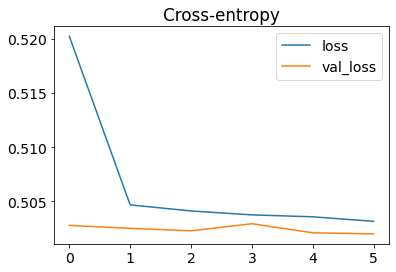

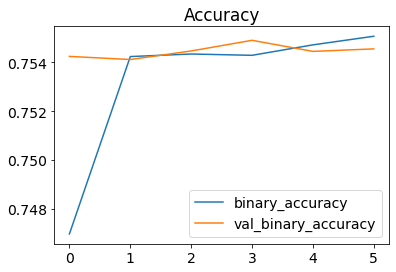

In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

**Hyperparameter tuning**

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import datetime

#Libraries for HyperParameter Tuning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [41]:
df_htune = df[['HeartDisease','BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease']]

In [42]:
# Preprocessing for numerical data
numerical_features = ['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #replace/impute the blank values with the mean
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = ['AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'Asthma', 'KidneyDisease'] 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = True))])

In [43]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LogisticRegression())])

In [44]:
#Splitting the dataset into training and test dataset
x1_train, x1_test, y1_train, y1_test = train_test_split(df_htune.loc[:,"BMI":"KidneyDisease"],
                                                    df_htune["HeartDisease"],
                                                    test_size= 0.3,
                                                    random_state=21)

In [45]:
param_grid = {
    'preprocessor__num__imputer__strategy' : ['mean','median'],
    #'model__penalty' : ['l1','l2','elasticnet','none'],
    'model__solver': ['newton-cg','lbfgs','liblinear'],
    'model__max_iter': [90,150,250]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose = 1,n_jobs= -1)
#cv : k Fold Cross Validation: No. of times the data needs to be split into training & test data and get 
#multiple models(trained on different patterns) and chose the model with better accuracy

# Preprocessing of training data, fit model 
grid_search.fit(x1_train, y1_train)

# Preprocessing of test data, get predictions
preds_test = grid_search.predict(x1_test)

print(f'Score: {grid_search.score(x1_test,y1_test)}')

# Print your best combination of hyper parameters
print("Optimum setting of hyperparameters:................")

grid_search.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score: 0.9154566964425311
Optimum setting of hyperparameters:................


{'model__max_iter': 90,
 'model__solver': 'newton-cg',
 'preprocessor__num__imputer__strategy': 'mean'}

In [46]:
# Create LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=90, solver='newton-cg')
lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)

In [47]:
print("Accuracy: ", accuracy_score(y_test,lr_y_predict))
print("Precision: ", precision_score(y_test,lr_y_predict))
print("Recall: ", recall_score(y_test,lr_y_predict))
print("F1-Score: ", f1_score(y_test,lr_y_predict))

Accuracy:  0.751626499328882
Precision:  0.7400274429089484
Recall:  0.7752053388090349
F1-Score:  0.7572080429223286


**Ridge**

In [48]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

RidgeClassifier()


RidgeClassifier(normalize=True)

In [49]:
rc.fit(x_train, y_train)
score = rc.score(x_train, y_train)
print("Score: ", score)

Score:  0.7532866684477691


In [50]:
cv_scores = cross_val_score(rc, x_train, y_train, cv=10)
print("Cross-Validation average score: %.2f" % cv_scores.mean())

Cross-Validation average score: 0.75


In [51]:
ypred = rc.predict(x_test)

In [52]:
print("Accuracy: ", accuracy_score(y_test,ypred))
print("Precision: ", precision_score(y_test,ypred))
print("Recall: ", recall_score(y_test,ypred))
print("F1-Score: ", f1_score(y_test,ypred))

Accuracy:  0.7521907513956689
Precision:  0.7390281114068687
Recall:  0.7791409993155373
F1-Score:  0.7585546263285909


**Principal Component Analysis**

In [53]:
# you can make this a lot easier using Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree', DecisionTreeClassifier())])

pipe.fit(x_train, y_train)

predictions = pipe.predict(x_test)

In [54]:
# from sklearn.cross_validation import cross_val_score
print(cross_val_score(pipe, x_train, y_train))

[0.77384985 0.7730911  0.77412771 0.77349719 0.77464066]


In [55]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("Precision: ", precision_score(y_test,predictions))
print("Recall: ", recall_score(y_test,predictions))
print("F1-Score: ", f1_score(y_test,predictions))

Accuracy:  0.7745043558549701
Precision:  0.7541695732132665
Recall:  0.8139972621492129
F1-Score:  0.7829421639948649


**Conclusion**

The main aim of this notebook was to identify the model which can determine if a person has heart disease based on other factors. We built Logistic Regression, Random Forest, K-neighbours Classifiers, Decision Tree, XGBoost, and Neural Network. All these models were compared based on different scores like F-score, Recall score, and accuracy. We even performed hyperparameter tuning for the logistic model to increase the accuracy. Among all the models Random Forest and Decision Tree gave the best accuracies. When F-1 and Recall score was compared, the Random Forest model was the best of all.



**References**

*    https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

*   https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
*   https://www.kaggle.com/code/une510/heart-disease-eda-prediction
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
*   https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
*   https://www.datacamp.com/tutorial/decision-tree-classification-python
*   https://pyimagesearch.com/2021/05/17/introduction-to-hyperparameter-tuning-with-scikit-learn-and-python/

